## About Dataset

#### Interest and Motivation
This dataset belongs to the MeToo movement on Twitter. This movement was against the sexual harassment incidents and many people posted various hatred tweets. Using this dataset, we can build a model that can accurately classify hatred and non-hatred tweets to restrict its spread.

In [1]:
#Import the Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/rahulgoel1106/hatred-on-twitter-during-metoo-movement')

Skipping, found downloaded files in ".\hatred-on-twitter-during-metoo-movement" (use force=True to force download)


In [3]:
#Load the dataset
data=pd.read_csv('hatred-on-twitter-during-metoo-movement/MeTooHate.csv')
data.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807174 entries, 0 to 807173
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   status_id        807174 non-null  int64 
 1   text             803638 non-null  object
 2   created_at       807174 non-null  object
 3   favorite_count   807174 non-null  int64 
 4   retweet_count    807174 non-null  int64 
 5   location         616406 non-null  object
 6   followers_count  807174 non-null  int64 
 7   friends_count    807174 non-null  int64 
 8   statuses_count   807174 non-null  int64 
 9   category         807174 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 61.6+ MB


In [5]:
data.shape

(807174, 10)

In [6]:
#Checking the null values in the data
data.isna().sum()/len(data)*100

status_id           0.000000
text                0.438072
created_at          0.000000
favorite_count      0.000000
retweet_count       0.000000
location           23.634062
followers_count     0.000000
friends_count       0.000000
statuses_count      0.000000
category            0.000000
dtype: float64

In [7]:
'''
Create a function to checking the null values in the data with percentage
in order wise.
'''
def checking_null_values(df):
    #we creat a for loop that will return which columns have null columns
    na_columns=[col for col in df.columns if df[col].isna().sum()>0]
    # We find the null values in the null columns this values or arranged in ascending format
    na_miss=df[na_columns].isna().sum().sort_values(ascending=False)
    #and this code will be multiplication with 100 covert in to percentage
    ratio=(df[na_columns].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    # then we finally concat the miss_values and percentge with np.round 2 values and finally we create a data frame
    missing_df=pd.concat([na_miss,np.round(ratio,2)],axis=1,keys=['Null values','Percentage'])
    missing_df=pd.DataFrame(missing_df)
    return missing_df.style.background_gradient(cmap='winter_r')
checking_null_values(data)

,Null values,Percentage
location,190768,23.630000
text,3536,0.440000


In [8]:
#See the numerical columns in the data
numerical=[col for col in data.columns if data[col].dtype!='object']
numerical

['status_id',
 'favorite_count',
 'retweet_count',
 'followers_count',
 'friends_count',
 'statuses_count',
 'category']

# Explore Data Analysis Process 

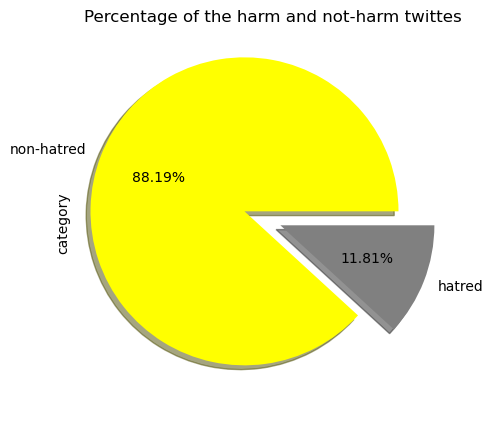

In [9]:
'''
Two find the Percentage of the label data and visulize with pie chart.
in the pie chart 88% of the data is not horm and and reaming 11% is harmfull tweets.
'''
data['category'].value_counts()\
.sort_values(ascending=False)\
.plot(kind='pie',explode=[0.2,0.05],
    labels=['non-hatred','hatred'],
    colors=['yellow','gray'],
    autopct='%1.2f%%',
    shadow=True,title="Percentage of the harm and not-harm twittes",figsize=(16,5))
plt.show()

### Observations:
###### 1) From the above chart we visualize the label data
###### 2)We abserve 88% data is not harmful and remaing 12% is harmfull data

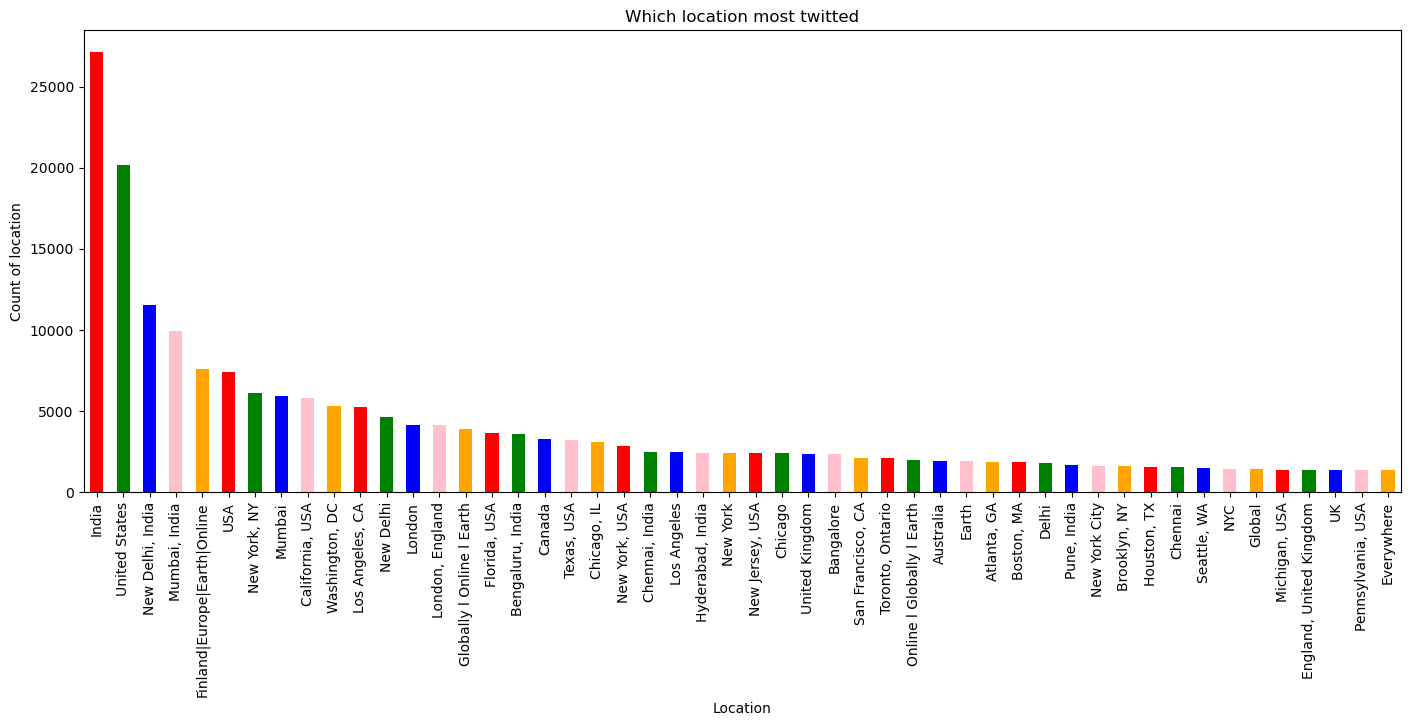

In [10]:
'''To visualize the top 50 countrys most twitted
'''
data['location'].value_counts()[:50]\
.sort_values(ascending=False)\
.plot(kind='bar',title="Which location most twitted",figsize=(17,6),color=['red','green','blue','pink','orange'])
plt.xlabel("Location")
plt.ylabel("Count of location")
plt.show()

### Observations:
###### 1)From the data most twittes recevies from the india after that USA

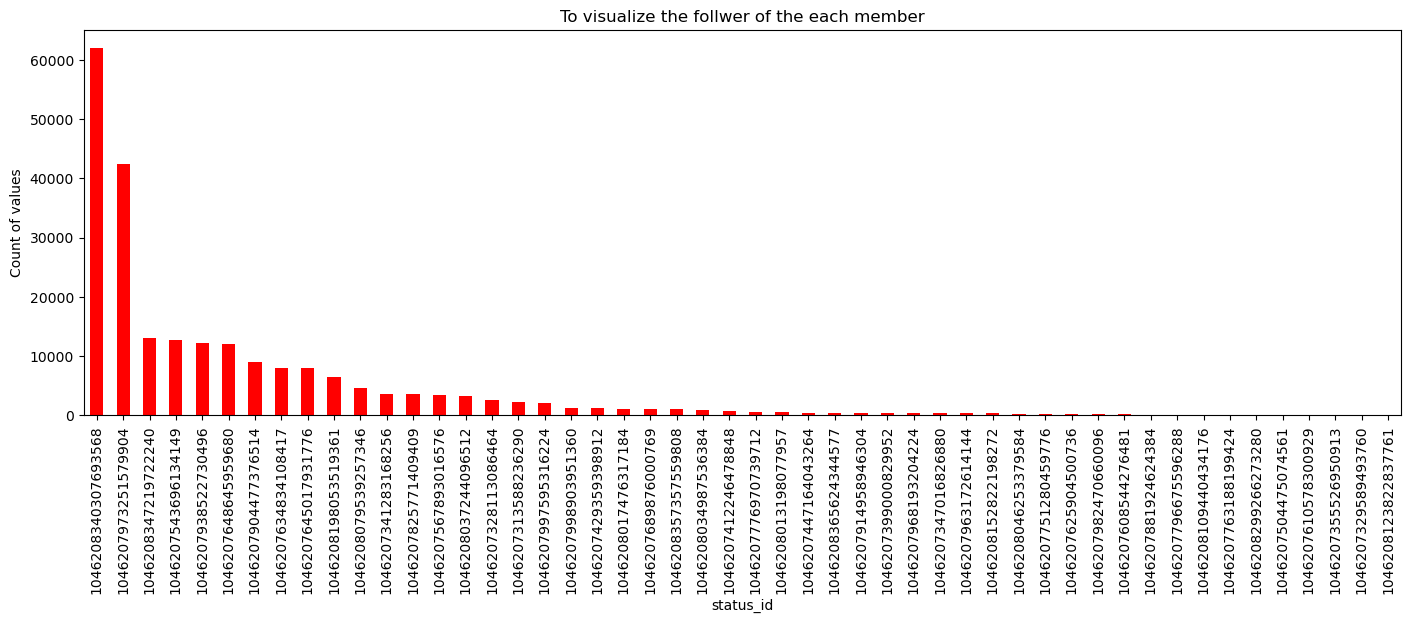

In [11]:
#Visualize the followers with status_id and 
data.groupby(['status_id'])['followers_count'].sum()[:50]\
.sort_values(ascending=False)\
.plot(kind='bar',figsize=(17,5),title="To visualize the follwer of the each member",color='r')
plt.xlabel("status_id")
plt.ylabel("Count of values")
plt.show()

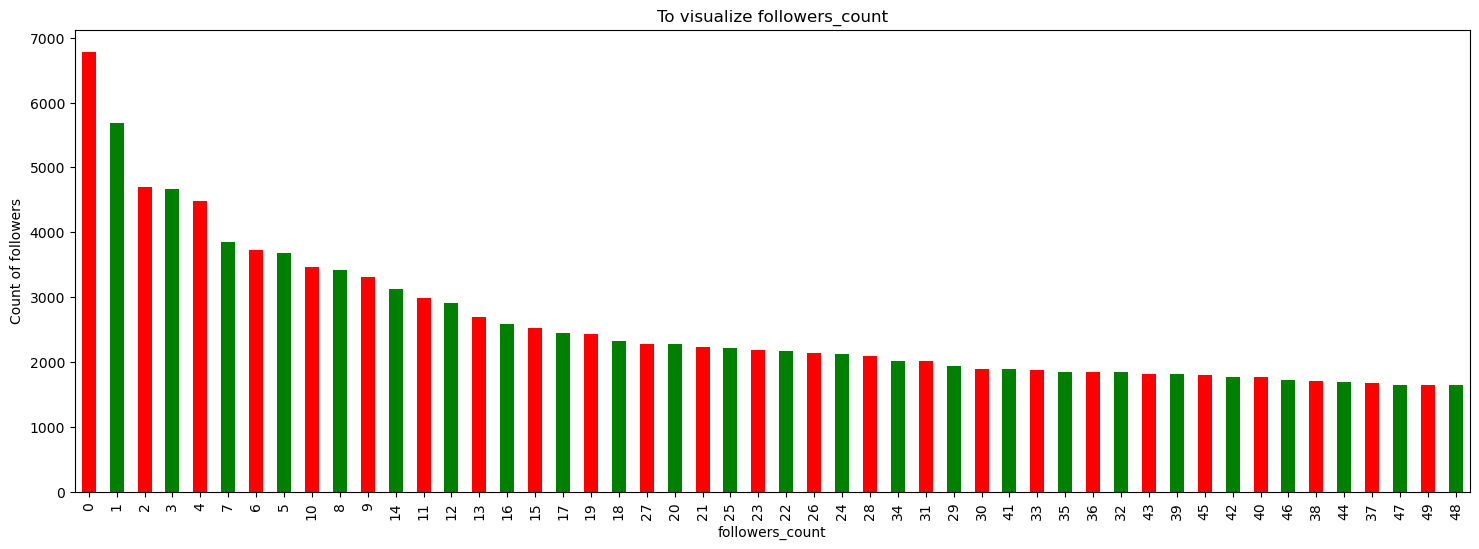

In [12]:
# To visualize the followers_count in the data
data['followers_count'].value_counts().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(18,6),title='To visualize followers_count',color=['red','green'])
plt.xlabel('followers_count')
plt.ylabel('Count of followers')
plt.show()

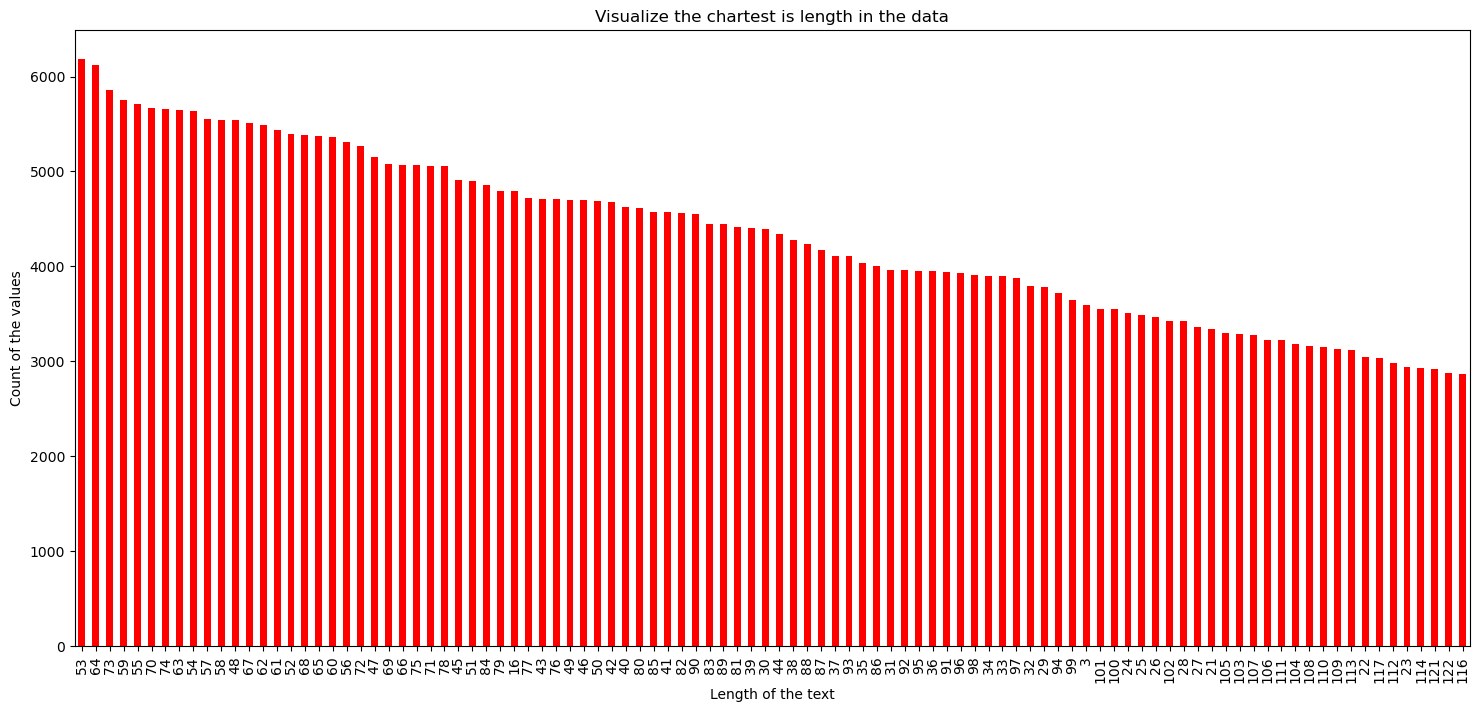

In [44]:
#Visualize the text length in the text data
data['text']=data['text'].astype(str)
data['text_length']=data['text'].apply(len)
data['text_length'].value_counts()[:100].plot(kind='bar',figsize=(18,8),title="Visualize the chartest is length in the data",color='r')
plt.xlabel("Length of the text")
plt.ylabel("Count of the values")
plt.show()

### Observations:
###### 1)From the above data 53 char text most used in the data and then 64 char length text used

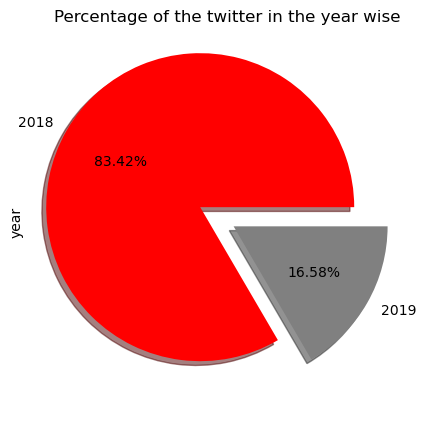

In [13]:
'''Coverted the date time column into date and month and year format
   and extract the year and month and visualize the which year most twitted
'''
data['created_at']=pd.to_datetime(data['created_at'])
data['year']=data['created_at'].dt.year
data['month']=data['created_at'].dt.month
data['year'].value_counts().plot(kind='pie',explode=[0.2,0.05],
    labels=['2018','2019'],
    colors=['red','gray'],
    autopct='%1.2f%%',
    shadow=True,title="Percentage of the twitter in the year wise",figsize=(16,5))
plt.show()


##### Observations:
###### Most of the twittes are twitted in 2018 with  83% percentage and 16%  twitted in 2019 year

In [14]:
'''
In this code we create which is highest flowers in both followers and friends columns
'''
follwer_max=data['followers_count'].max()
follwer_min=data['followers_count'].min()
friend_max=data['friends_count'].max()
friend_min=data['friends_count'].min()
print(f'the highest followers in the data is {follwer_max} ')
print(f'the highest followers in the data is {follwer_min}')
print(f'the highest friends in the data is {friend_max}')
print(f'the highest friends in the data is {friend_min}')

the highest followers in the data is 54576429 
the highest followers in the data is 0
the highest friends in the data is 899383
the highest friends in the data is 0


# Data Cleaning Process
#### 1) Remove the punctuation
#### 2)Remove the stopwords
#### 3)Stemming Process
#### 4)Lemmatization Process
#### 5)Apply the all function into the text data

In [15]:
#import the string function and remove the spectial chartestirc
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#Remove the Punctuations from the data we take the  sample question for analysize the all the process
harm=data[data['category']==1]
q1=harm['text'].values[0]
q1

'Yep just like triffeling women weaponized their poon!! Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him, oh yeh, that how she got her first job me too is a JOKE! '

In [17]:
#We remove extra keywords in the data with sample question
test_punc_remove=[char for char in q1 if char not in string.punctuation]
test_punc_removed=''.join(test_punc_remove)
test_punc_removed

'Yep just like triffeling women weaponized their poon Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him oh yeh that how she got her first job me too is a JOKE '

In [18]:
#Another method for removing the string punctuations
'''We create a empty list throgh the in for loop if char in question
   Then if this char not in string.punctuation then append to the empty list
   and finaly join the char
'''
test_punc_removes=[]
for char in q1:
    if char not in string.punctuation:
        test_punc_removes.append(char)
punc_remove=''.join(test_punc_removes)
punc_remove

'Yep just like triffeling women weaponized their poon Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him oh yeh that how she got her first job me too is a JOKE '

In [19]:
#Create a fucntion remove the string punctions in the data
def punction_remove(text):
    if isinstance(text, float):
        return text
    else:
        test_punc_remove=[char for char in text if char not in string.punctuation]
        test_punc_removed=''.join(test_punc_remove)
        return test_punc_removed
data['text']=data['text'].apply(punction_remove)

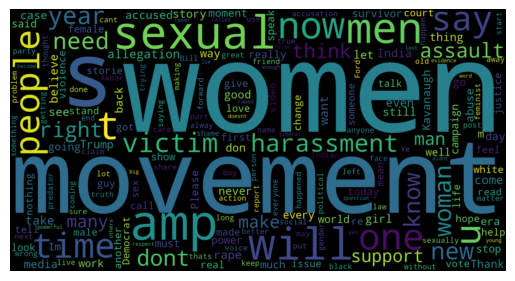

In [20]:
#To visualize the most used words in the data
text = " ".join(str(i) for i in data['text'])
word_cloud1 = WordCloud(collocations = False, background_color = 'black',width = 2048, height = 1080,mode='RGB').generate(text)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#Remove the stopwords from the data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
#jion the stopwords
stopwords=','.join(stopwords.words('english'))
stopwords

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [22]:
#Word_tokenization with removed the string punctuations with sample question
tokenize=word_tokenize(punc_remove)
tokenize

['Yep',
 'just',
 'like',
 'triffeling',
 'women',
 'weaponized',
 'their',
 'poon',
 'Wonder',
 'if',
 'Kamala',
 'Harris',
 'ever',
 'extorted',
 'Willy',
 'Brown',
 'after',
 'throwing',
 'the',
 'poon',
 'on',
 'him',
 'oh',
 'yeh',
 'that',
 'how',
 'she',
 'got',
 'her',
 'first',
 'job',
 'me',
 'too',
 'is',
 'a',
 'JOKE']

In [23]:
'''Remove the stopwords form the tokenization words we create a function
we convert the words into lower then if the words not in stopword
'''
def stopwords_english(text):
    return [word for word in text if word.lower() not in stopwords]
stopwords_remove=stopwords_english(tokenize)
stopwords_remove

['Yep',
 'like',
 'triffeling',
 'women',
 'weaponized',
 'poon',
 'Wonder',
 'Kamala',
 'Harris',
 'ever',
 'extorted',
 'Willy',
 'Brown',
 'throwing',
 'poon',
 'oh',
 'yeh',
 'got',
 'first',
 'job',
 'JOKE']

In [24]:
#Stemmimg process for with stopwords removel data
stemmer=SnowballStemmer(language='english')
stemming_process=[stemmer.stem(word) for word in stopwords_remove]
stemming_process

['yep',
 'like',
 'triffel',
 'women',
 'weapon',
 'poon',
 'wonder',
 'kamala',
 'harri',
 'ever',
 'extort',
 'willi',
 'brown',
 'throw',
 'poon',
 'oh',
 'yeh',
 'got',
 'first',
 'job',
 'joke']

In [25]:
#Create a fuction for the stemming process and lemmatization 
def stemming(text):
    stemming=[stemmer.stem(word) for word in stopwords_remove]
    stemming=''.join(stemming)
    return stemming
lemmatizer = WordNetLemmatizer()
q1_lem=lemmatizer.lemmatize(q1)
q1_lem

'Yep just like triffeling women weaponized their poon!! Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him, oh yeh, that how she got her first job me too is a JOKE! '

In [26]:
data.shape

(807174, 12)

In [27]:
#take the 1 lakhs sample_data
sample_data=data.sample(100000)

In [28]:
'''Create a function 
'''
def text_preprocessing(text):
    if isinstance(text, str):
        # Word_tokenize
        words = word_tokenize(text)
        # Stop words removal
        words = [word for word in words if word not in stopwords]
        # Stemming process
        words = [stemmer.stem(word) for word in words]
        # Lemmatization
        words = [lemmatizer.lemmatize(word) for word in words]
        # Convert all words to lowercase
        words = [word.lower() for word in words]
        words = ' '.join(words)
        return words
    else:
        return text

sample_data['text']=sample_data['text'].apply(text_preprocessing)

In [29]:
#drop the null values in the rows
sample_data.dropna(axis=0,inplace=True)

In [30]:
sample_data.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,year,month
137123,1049307112495407106,absolut undermin movement is one allow differ ...,2018-10-08 14:34:45+00:00,24,8,"San Francisco, CA",65849,960,54940,1,2018,10
592116,1070109680406589441,doubl effet kiss cool,2018-12-05 00:16:44+00:00,0,0,France,455,1205,6085,0,2018,12
754246,1088022943970611200,is,2019-01-23 10:37:38+00:00,0,0,International Waters,34,324,1200,0,2019,1
368028,1053168144951455745,standup comedian hypocrisi left fmf,2018-10-19 06:17:07+00:00,1,0,Hooghly,14,265,89,0,2018,10
794474,1095736243420389377,codifi into intern law council foreign relat,2019-02-13 17:27:32+00:00,0,0,"Houston, TX",172,188,122545,0,2019,2


In [31]:
#Let's take the independent and dependent variables
X=sample_data['text'].values
y=sample_data['category'].values


# Machine Learning Modeling Process

In [32]:
#All the maachine learning libries for model evaluation and model score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [33]:
#install the TfidfVectorizer and fit with the data and transform into matrix format
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)
X

<75997x39629 sparse matrix of type '<class 'numpy.float64'>'
	with 889807 stored elements in Compressed Sparse Row format>

In [34]:
#divided the data into train and test we take 25% data is testing and 75 % training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=125)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56997, 39629)
(19000, 39629)
(56997,)
(19000,)


The LogisticRegression() accuracy_score is 92.98
The classification_repore of LogisticRegression() is               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16781
           1       0.89      0.45      0.60      2219

    accuracy                           0.93     19000
   macro avg       0.91      0.72      0.78     19000
weighted avg       0.93      0.93      0.92     19000

[[16658   123]
 [ 1210  1009]]


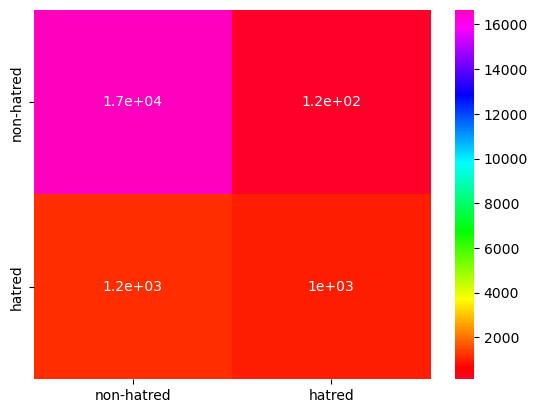

In [35]:
#machine Learning modelbuliding
'''in the function we fit the data into x_train,y_train 
   and predict the x_test data and checking the accuracy_score
   and classification_report and finally confusion_matrix
'''
def model_bulding(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'The {model} accuracy_score is {accuracy_score(y_test,y_pred)*100:.2f}')
    print(f'The classification_repore of {model} is {classification_report(y_test,y_pred)}')
    matrix=confusion_matrix(y_test,y_pred)
    print(matrix)
    sns.heatmap(matrix,annot=True,cmap='gist_rainbow',xticklabels=['non-hatred','hatred'],yticklabels=['non-hatred','hatred'])
#Apply the LogisticRegression to the model
logistic=LogisticRegression()
model_bulding(logistic,X_train,X_test,y_train,y_test)

The DecisionTreeClassifier() accuracy_score is 92.49
The classification_repore of DecisionTreeClassifier() is               precision    recall  f1-score   support

           0       0.95      0.96      0.96     16781
           1       0.69      0.64      0.67      2219

    accuracy                           0.92     19000
   macro avg       0.82      0.80      0.81     19000
weighted avg       0.92      0.92      0.92     19000

[[16153   628]
 [  798  1421]]


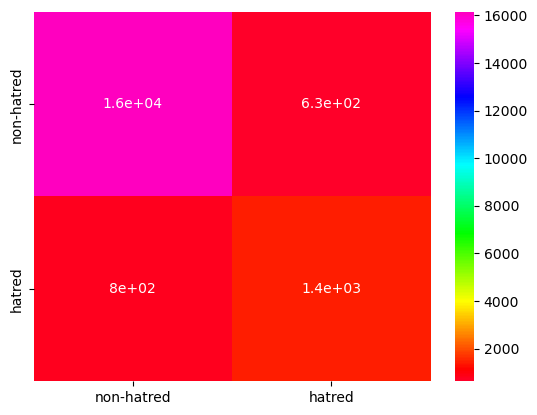

In [36]:
#Apply the DecisionTreeClassifier to the model
decision=DecisionTreeClassifier()
model_bulding(decision,X_train,X_test,y_train,y_test)

The KNeighborsClassifier() accuracy_score is 88.87
The classification_repore of KNeighborsClassifier() is               precision    recall  f1-score   support

           0       0.89      1.00      0.94     16781
           1       0.82      0.06      0.11      2219

    accuracy                           0.89     19000
   macro avg       0.86      0.53      0.53     19000
weighted avg       0.88      0.89      0.84     19000

[[16753    28]
 [ 2087   132]]


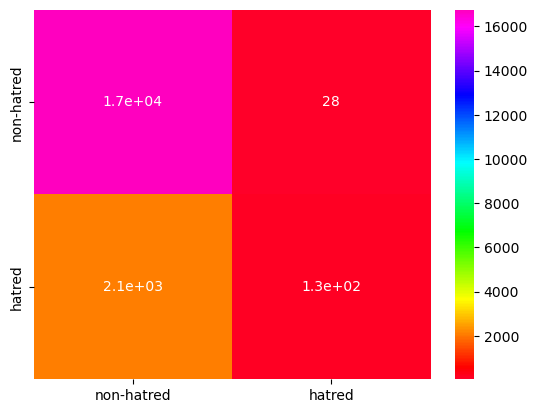

In [37]:
#Apply the KNeighborsClassifier to the model
knn=KNeighborsClassifier()
model_bulding(knn,X_train,X_test,y_train,y_test)

The MultinomialNB() accuracy_score is 88.55
The classification_repore of MultinomialNB() is               precision    recall  f1-score   support

           0       0.89      1.00      0.94     16781
           1       0.83      0.02      0.05      2219

    accuracy                           0.89     19000
   macro avg       0.86      0.51      0.49     19000
weighted avg       0.88      0.89      0.84     19000

[[16770    11]
 [ 2164    55]]


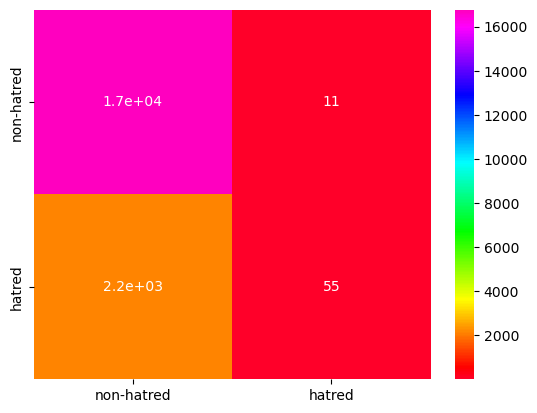

In [38]:
#Apply the MultinomialNB to the model
multi=MultinomialNB()
model_bulding(multi,X_train,X_test,y_train,y_test)

The BernoulliNB() accuracy_score is 88.51
The classification_repore of BernoulliNB() is               precision    recall  f1-score   support

           0       0.92      0.96      0.94     16781
           1       0.51      0.35      0.41      2219

    accuracy                           0.89     19000
   macro avg       0.71      0.65      0.67     19000
weighted avg       0.87      0.89      0.88     19000

[[16048   733]
 [ 1450   769]]


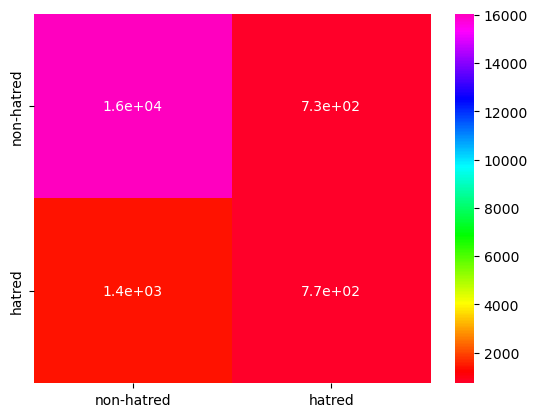

In [39]:
#Apply the BernoulliNB to the model
bern=BernoulliNB()
model_bulding(bern,X_train,X_test,y_train,y_test)

The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) accuracy_score is 94.28
The classification_repore of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
    

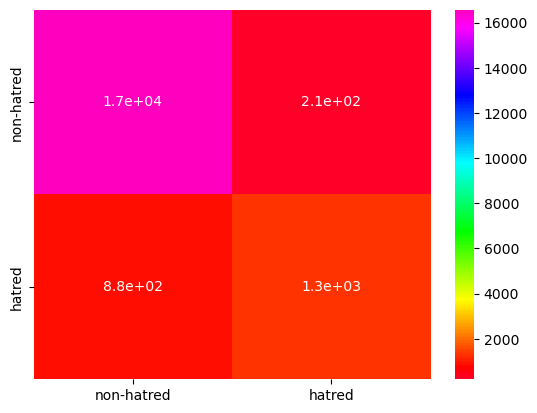

In [40]:
#Apply the MultinomialNB to the model
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_bulding(xgb,X_train,X_test,y_train,y_test)

## Machine Learning model Accuracy_scores:
###### 1)LogisticRegression we get around 93% accuracy_score
###### 2)DecisionTreeClassifier get around 92% accuracy_score
###### 3) KNeighborsClassifier get around 89% accuracy_score
###### 4) MultinomialNB get around 89% accuracy_score
###### 5) BernoulliNB get around 89 % accuracy_score
###### 6)XGBClassifier get around 94 % accuracy_score